---

##### ***Analisis tahun dan wilayah gempah di Indonesia dari tahun 2009 sampai 2022***
---

### **LINK DASHBOARD :**
 
#### https://public.tableau.com/app/profile/noufal.rifata.reyhan/vizzes

## IDENTIFIKASI MASALAH :

*Analisis Trend tahun dan wilayah Gempa di Indonesia dari Tahun 2009 hingga tahun 2022.*

### Domain Knowledge 

- gempa dikategorikan besar atau merusak ketika gempa tersebut berada diatas 6.1 magnitudo

- gempa yang kurang dari 6.0 magnitudo dan masih diatas 5.1 magnitudo hanya berpotensi merusak untuk wilayah pusat gempanya saja

- gempa yang kurang dari 5.0 magnitudo dikategorikan sebagai gempa kecil

- bulan april hingga bulan september akan dianggap sebagai musim kemarau dan bulan oktober hingga maret dianggap sebagai musim penghujan

- pusat gempa yang berada diluar wilayah Indonesia bila energi gelombang gempa masih berdampak pada wilayah Indonesia maka dianggap termasuk sebagai gempa di Indonesia

In [1]:
# MENGIMPORT PACKAGE YANG AKAN DIGUNAKAN.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
# MEMBACA CSV.
rawdata = pd.read_csv("data_gempa.csv")

# MENAMPILKAN CSV.
rawdata

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92882,2023/01/26,02:25:09.288,3.24,127.18,10,4.0,Talaud Islands - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
92883,2023/01/26,02:15:03.893,2.70,127.10,10,3.9,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN
92884,2023/01/26,01:57:08.885,-7.83,121.07,10,3.8,Flores Sea,NaN,NaN,NaN,NaN,NaN,NaN
92885,2023/01/26,01:46:21.009,3.00,127.16,10,4.1,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN


## METODE S.M.A.R.T

- Spesific: melakukan perencanaan anggaran dan persiapan penanggulangan gempa sekaligus rencana tatakota dan evaluasi pemilihan lokasi ibukota baru

- Measurable: meningkatkan efisiensi anggaran penanggulangan bencana gempa termasuk biaya rapat penanggulangan bencana gempa sebesar 30%

- Achievable: efisiensi tersebut dapat dicapai karena jumlah rapat yang diperlukan menjadi lebih sedikit karena patternya sudah dianalisis

- Relevant: meneliti terkait trend gempa penting untuk mempersiapkan cara dan anggaran penaggulangan gempa

- Timebound: dalam waktu satu bulan setelah penerapan hasil data ini anggaran dan perencanaan yang baru sudah selesai untuk diimplementasikan ke para mentri dan dinas terkait

## Problem Statement

1. Wilayah mana yang paling banyak atau yang paling berpotensi untuk mengalami gempa?

2. Untuk tahun depan (2024) apakah dapat dibuktikan menurun atau menaik berdasarkan trend timeseries?

3. Apakah ada keterkaitan antara musim penghujan dan musim kemarau dengan kejadian gempa untuk keseluruhan wilayah indonesia ataupun di wilayah tertentu?

4. apakah ada kecenderungan pada bulan tertentu terkait frekuensi kemunculan gempa?

### **5 W + 1 H**

- When: Kapan gempa paling besar terjadi?

- When: Tahun berapa paling sering terjadi gempa?

- Where: dimana wilayah yang paling sering mengalami gempa?

- Where: dimana gempa-gempa besar sering terjadi?

- What: Pada musim apa gempa paling sering jadi?

- How : bagaimana pesebaran kejadian gempa berdasarkan bulan dari tahun 2009 hingga tahun 2022?

## DATA LOADING

### **Sumber data ini adalah dari :**

#### https://www.kaggle.com/datasets/kekavigi/earthquakes-in-indonesia

## DATA CLEANING DAN PREPARATION

In [4]:
dataprocessing = rawdata.copy()
dataprocessing['tgl'] = dataprocessing['tgl'] + ' ' + dataprocessing['ot']
dataprocessing = dataprocessing.drop(['ot','strike1', 'dip1','rake1','strike2','dip2','rake2'], axis=1)
dataprocessing.rename(columns={"tgl":"waktu", "lat":"derajat_lintang", "lon":"derajat_bujur", "depth":"kedalaman(km)", "mag":"magnitudo","remark":"wilayah" }, inplace=True)
dataprocessing["waktu"] = pd.to_datetime(dataprocessing["waktu"])
dataprocessing['musim'] = np.where((dataprocessing['waktu'].dt.month >= 4) & (dataprocessing['waktu'].dt.month <= 9),'kemarau','penghujan')
dataprocessing

,waktu,derajat_lintang,derajat_bujur,kedalaman(km),magnitudo,wilayah,musim
0,2008-11-01 21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,penghujan
1,2008-11-01 20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,penghujan
2,2008-11-01 17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,penghujan
3,2008-11-01 16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,penghujan
4,2008-11-01 16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,penghujan
...,...,...,...,...,...,...,...
92882,2023-01-26 02:25:09.288,3.24,127.18,10,4.0,Talaud Islands - Indonesia,penghujan
92883,2023-01-26 02:15:03.893,2.70,127.10,10,3.9,Northern Molucca Sea,penghujan
92884,2023-01-26 01:57:08.885,-7.83,121.07,10,3.8,Flores Sea,penghujan
92885,2023-01-26 01:46:21.009,3.00,127.16,10,4.1,Northern Molucca Sea,penghujan


*"""*

*variabel dataprocessing akan menjadi dataframe yang digunakan unntuk* *menyimpan data yang akan digunakan,*
*kemungkinan untuk mencari data tertentu akan ada variabel dataframe* *baru yang diambil dari dataframe dataprocessing*

*"""*

In [5]:
dataprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   waktu            92887 non-null  datetime64[ns]
 1   derajat_lintang  92887 non-null  float64       
 2   derajat_bujur    92887 non-null  float64       
 3   kedalaman(km)    92887 non-null  int64         
 4   magnitudo        92887 non-null  float64       
 5   wilayah          92887 non-null  object        
 6   musim            92887 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 5.0+ MB


In [6]:
dataprocessing['musim'] = np.where((dataprocessing['waktu'].dt.month >= 4) & (dataprocessing['waktu'].dt.month <= 9),'kemarau','penghujan')
dataprocessing

,waktu,derajat_lintang,derajat_bujur,kedalaman(km),magnitudo,wilayah,musim
0,2008-11-01 21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,penghujan
1,2008-11-01 20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,penghujan
2,2008-11-01 17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,penghujan
3,2008-11-01 16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,penghujan
4,2008-11-01 16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,penghujan
...,...,...,...,...,...,...,...
92882,2023-01-26 02:25:09.288,3.24,127.18,10,4.0,Talaud Islands - Indonesia,penghujan
92883,2023-01-26 02:15:03.893,2.70,127.10,10,3.9,Northern Molucca Sea,penghujan
92884,2023-01-26 01:57:08.885,-7.83,121.07,10,3.8,Flores Sea,penghujan
92885,2023-01-26 01:46:21.009,3.00,127.16,10,4.1,Northern Molucca Sea,penghujan


In [7]:
# 'datagempa' digunakan untuk pemanggilan-pemanggilan berikutnya
datagempa = dataprocessing[(dataprocessing['waktu'] >= '2009-01-01')&(dataprocessing['waktu'] < '2023-01-01')].copy()

## ANALYSIS DAN PERHITUNGAN

### **GEMPA TERBESAR PADA MASING-MASING TAHUN.**

<function matplotlib.pyplot.show(close=None, block=None)>

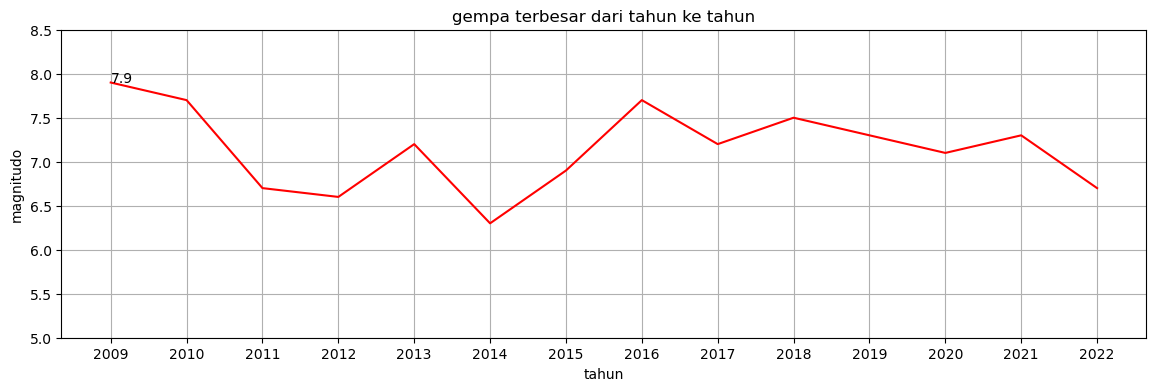

In [8]:
gempa_terbesar = datagempa.groupby([datagempa['waktu'].dt.year])['magnitudo'].max()
fig, ax = plt.subplots(ncols=1,figsize=(14,4))
gempa_terbesar.plot(kind='line', color='red', ax=ax)
plt.yticks(np.arange(5, 9, 0.5))
plt.xticks(np.arange(2009, 2023))
plt.grid(True)
plt.text(2009, gempa_terbesar[2009], str(gempa_terbesar[2009]))
plt.xlabel("tahun")
plt.xlabel("tahun")
plt.ylabel("magnitudo")
plt.title("gempa terbesar dari tahun ke tahun")
plt.show

*Pada line chart ini, diketahui bahwa gempa yang paling besar yang pernah terjadi sejak tahun 2009 hingga tahun 2022 ialah sebesar 7.9 magnitudo yang terjadi pada tahun 2009. Pada masing-masing tahun, 2014 merupakan tahun yang gempa terbesarnya paling rendah dibandingkan tahun-tahun lainya dimana gempa tersebut bernilai dibawah 6.5 magnitudo. Namun walau yang paling rendah, gempa pada tahun 2014 tetap dikategorikan sebagai gempa besar karena telah lebih dari 6.0. Pada chart ini dapat disimpulkan bahwa tiap-tiap tahun dari tahun 2014 hingga tahun 2022 selalu terdapat gempa besar di wilayah Indonesia.*

In [9]:
# Data penduung chart 'gempa terbesar dari tahun ke tahun'
gempa_terbesar1 = datagempa['magnitudo'].idxmax()
print(datagempa.loc[gempa_terbesar1])

waktu                 2009-01-03 19:43:54.962000
derajat_lintang                            -0.54
derajat_bujur                             132.89
kedalaman(km)                                 17
magnitudo                                    7.9
wilayah            Irian Jaya Region - Indonesia
musim                                  penghujan
Name: 345, dtype: object


*Gempa terbesar di Indonesia sejak tahun 2009 hingga tahun 2022 terjadi di bulan januari tanggal 3 tahun 2009 di wilayah Irian Jaya*

### **GEMPA TERBESAR PADA MASING-MASING MUSIM.**

<function matplotlib.pyplot.show(close=None, block=None)>

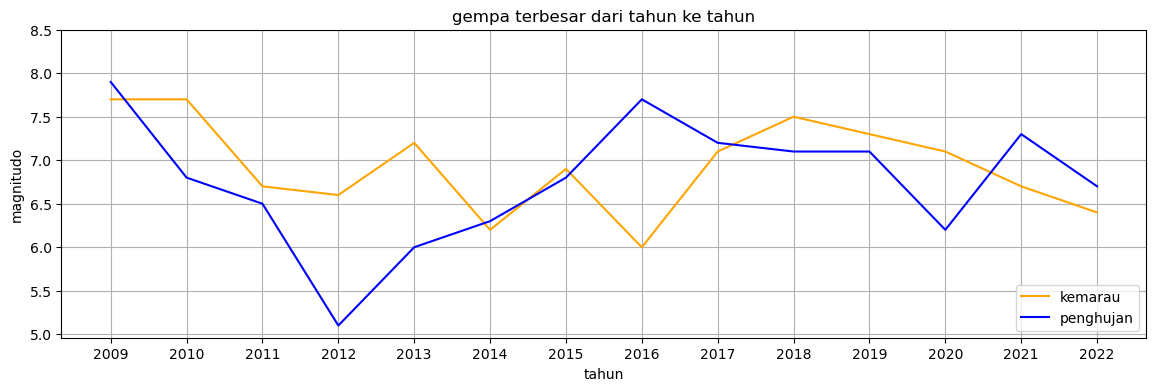

In [10]:
kemarau = datagempa[datagempa['musim'].isin(['kemarau'])]
penghujan = datagempa[datagempa['musim'].isin(['penghujan'])]
gempaKemarau = kemarau.groupby([kemarau['waktu'].dt.year])['magnitudo'].max()
gempaPenghujan = penghujan.groupby([penghujan['waktu'].dt.year])['magnitudo'].max()

fig, ax = plt.subplots(ncols=1,figsize=(14,4))
gempaKemarau.plot(kind='line',label='kemarau',color='orange', ax=ax)
gempaPenghujan.plot(kind='line',label='penghujan', color='blue', ax=ax)
plt.yticks(np.arange(5, 9, 0.5))
plt.xticks(np.arange(2009, 2023))
plt.grid(True)
plt.xlabel("tahun")
plt.ylabel("magnitudo")
plt.title("gempa terbesar dari tahun ke tahun")
plt.legend(loc='lower right')
plt.show

*Pada grafik diatas, diketahui bahwa pada musim penghujan terdapat kejadian gempa yang magnitudonya lebih besar daripada musim kemarau hanya pada tahun 2009, 2016,2017, 2021, dan 2022 sedangkan selebihnya musim kemarau yang gempanya lebih besar. Pada musim penghujan tahun 2012, 2013 dan 2020 tidak terjadi gempa dengan skala besar, Sedangkan pada musim kemarau selalu terjadi gempa besar setiap tahunya kecuali tahun 2016 walau hampir dikategorikan besar. Secara visual pada grafik, musim kemarau cenderung lebih mungkin untuk terjadi gempa yang lebih besar. Namun untuk pembuktianya maka perlu dilakukan adanya perhitungan statistik.*

In [11]:
skew_kema = stats.skew(gempaKemarau)
skew_huj = stats.skew(gempaPenghujan)
print(f"skewness data gempa kemarau = {skew_kema}\nskewness data gempa penghujan = {skew_huj}")

skewness data gempa kemarau = -0.15264763250777008
skewness data gempa penghujan = -0.5779330083535742


*karena salah satu pesebaranya tidak normal, maka untuk uji apakah kedua data musim ini memiliki perbedaan atau tidak akan digunakan uji mann-whitney*

In [12]:
statistik, p_value = stats.mannwhitneyu(gempaKemarau, gempaPenghujan)
print("Statistik Uji Mann-Whitney:", statistik)
print("Nilai pValue ann-Whitney:", p_value)

Statistik Uji Mann-Whitney: 109.0
Nilai pValue ann-Whitney: 0.6284027368749059


*HO: Tidak ada perbedaan yang signifikan antara gemppa di musim kemarau dan gempa di musim penghujan.*

*H1: Ada perbedaan yang signifikan antara gempa di musim kemarau dan gempa di musim penghujan.*

*karena pvalue jauh lebih besar dari 0.05 maka H0 ditolak dan data gempa terbesar pada masing-masing tahun pada musim kemarau dan musim penghujan memiliki perbedaan*

### **FREKUENSI GEMPA PER TAHUN DARI 2009 HINGGA TAHUN 2022.**

<function matplotlib.pyplot.show(close=None, block=None)>

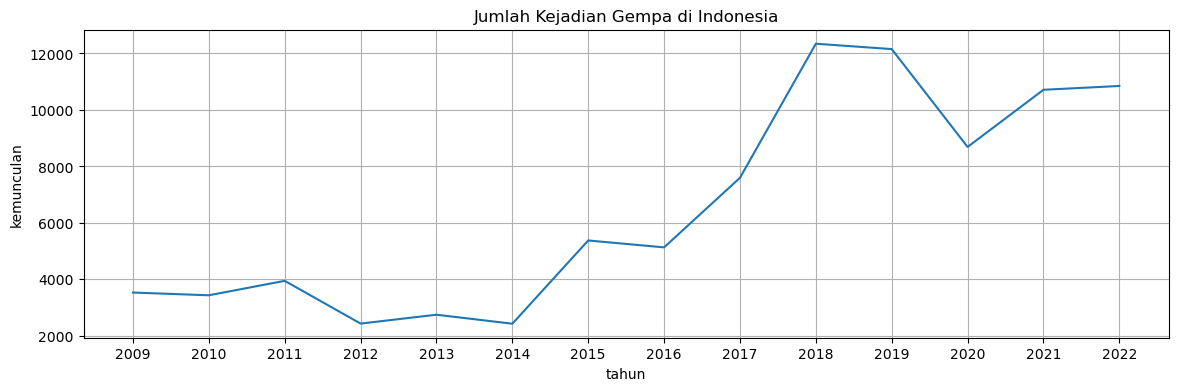

In [13]:
frekuensi_tahunan = datagempa.groupby(datagempa['waktu'].dt.year)['waktu'].count()
fig, ax = plt.subplots(ncols=1,figsize=(14,4))
frekuensi_tahunan.plot(kind='line', ax=ax)
plt.xticks(np.arange(2009, 2023))
plt.grid(True)
plt.xlabel("tahun")
plt.ylabel("kemunculan")
plt.title("Jumlah Kejadian Gempa di Indonesia")
plt.show


*Grafik ini menunjukan trend frekuensi kejadian gempa di wilayah Indonesia. pada Grafik ini diketahui frekuensi kejadian mengalai peningkatan sejak tahun 2017. Untuk penyebab kejadain ini diperlukan tim spesialis untuk kasus ini, namun jika dilihat dari pattern datanya, untuk tahun 2023 frekuensi kejadian gempa diperkirakan akan tetap tinggi karena belum ada tanda-tanda penurunan berdasarkan grafik.*

### **FREKUENSI GEMPA PERTAHUN DAN PERMUSIM.**

<function matplotlib.pyplot.show(close=None, block=None)>

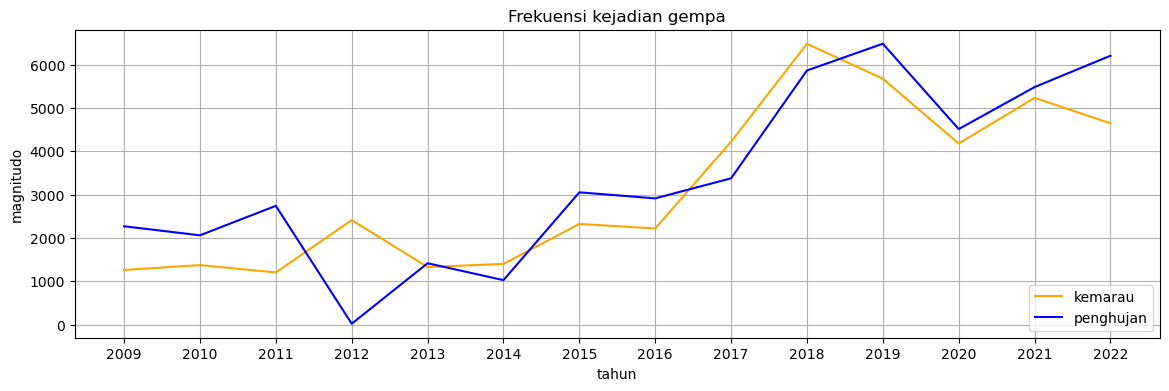

In [14]:
frek_gempaKemarau = kemarau.groupby([kemarau['waktu'].dt.year])['magnitudo'].count()
frek_gempaPenghujan = penghujan.groupby([penghujan['waktu'].dt.year])['magnitudo'].count()

fig, ax = plt.subplots(ncols=1,figsize=(14,4))
frek_gempaKemarau.plot(kind='line',label='kemarau',color='orange', ax=ax)
frek_gempaPenghujan.plot(kind='line',label='penghujan', color='blue', ax=ax)
plt.xticks(np.arange(2009, 2023))
plt.grid(True)
plt.xlabel("tahun")
plt.ylabel("magnitudo")
plt.title("Frekuensi kejadian gempa")
plt.legend(loc='lower right')
plt.show

*Grafik ini kembali digunakan sebagai analsiis terhadap adanya keterkaitan antara kejadian gempa dengan musim di Indonesesia. sedangkan pada perbandingan musim, dari segi visual grafik menunjukan tidak terlalu signifikan mengenai adanya perbedaan frekuensi kejadian antara musim kemarau dan musim penghujan*

### **FREKUENSI GEMPA PERBULAN**

<function matplotlib.pyplot.show(close=None, block=None)>

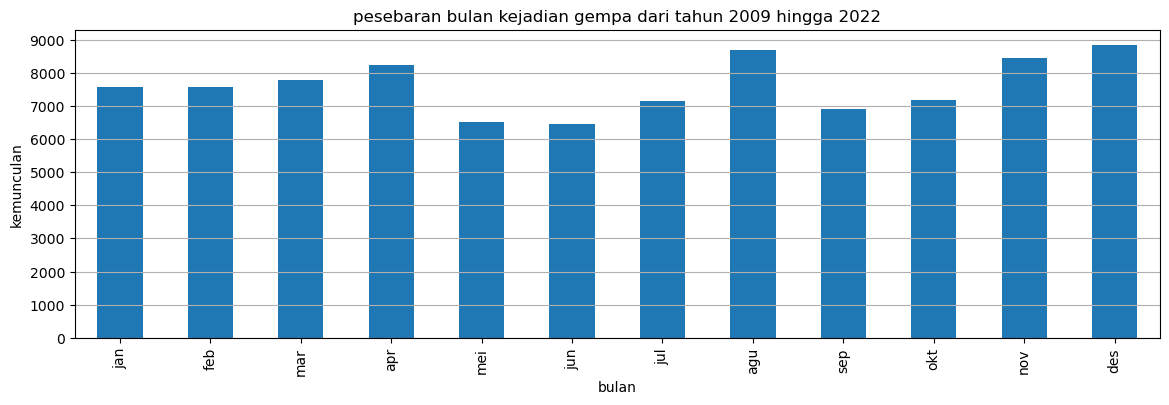

In [15]:
frekuensi_tahunan = datagempa.groupby(datagempa['waktu'].dt.month)['waktu'].count()
fig, ax = plt.subplots(ncols=1,figsize=(14,4))
frekuensi_tahunan.plot(kind='bar', ax=ax)
x = np.arange(0, 12)
bulan = ('jan', 'feb','mar','apr','mei','jun','jul','agu','sep','okt','nov','des')
plt.xticks(x,  bulan)
plt.yticks(np.arange(0,10000,1000))
plt.grid(axis='y')
plt.xlabel("bulan")
plt.ylabel("kemunculan")
plt.title("pesebaran bulan kejadian gempa dari tahun 2009 hingga 2022")
plt.show

*Pesebaran kejadian gempa pada bulan tertentu sejak tahun 2009 hingga tahun 2022 menunjukan tidak begitu besar jarak antara bulan yang paling sering mengalami gempa dengan bulan yang paling jarang mengalami gempa. bulan yang paling sering mengalami gempa ialah bulan desember yaitu sebanyak hampir 9 ribu kejadian, sedangkan bulan yang paling sedikit mengalami gempa ialah bulan juni dan mei yairu 6 ribu lebih kejadian. Grafik ini masih belum cukup karena masih belum dipisahkan antara gempa kecil dan gempa besar*

### **FREKUENSI GEMPA BESAR DI INDONESIA SEJAK TAHUN 2009 SAMPAI TAHUN 2022.**

<function matplotlib.pyplot.show(close=None, block=None)>

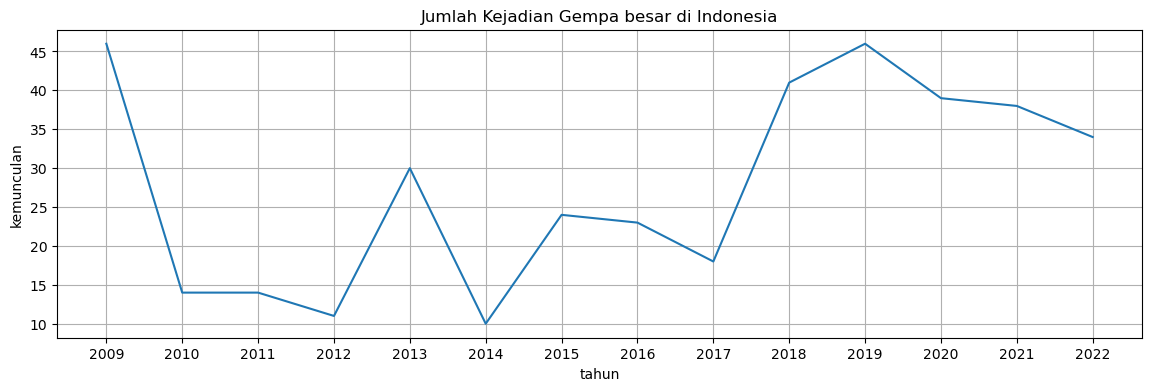

In [16]:
gempabesar = datagempa.loc[datagempa['magnitudo']>= 6.0]
fgempabesar = gempabesar.groupby(gempabesar['waktu'].dt.year)['waktu'].count()
fig, ax = plt.subplots(ncols=1,figsize=(14,4))
fgempabesar.plot(kind='line', ax=ax)
plt.xticks(np.arange(2009, 2023))
plt.grid(True)
plt.xlabel("tahun")
plt.ylabel("kemunculan")
plt.title("Jumlah Kejadian Gempa besar di Indonesia")
plt.show

*Pada Grafik ini diketaui gempa besar cukup banyak terjadi di tahun 2009, kemudian menurun di tahun 2010 hingga 2017 kecuali di tahun 2013 yang sedikit menaik. setelah itu sejak tahun 2018 mulai mengalami kenaikan jumlah frekuensi kejadian gempa besar lagi yang terus berlanjut hingga tahun 2022. Namun dari tahun 2019 hingga rahun 2022 mengalami penurunan jumlah kejadian gempa besar walaupun sedikit. Sehingga, dari grafik ini ada kemungkinan bahwa tahun 2023 akan tetap tinggi namun tetap mengalami penurunan*

### **RATA-RATA GEMPA BESAR PER TAHUN.**

In [17]:
fgempabesar = gempabesar.groupby(gempabesar['waktu'].dt.year)['waktu'].count()
mean_fgempabesar = fgempabesar.mean()
mean_fgempabesar

27.714285714285715

*Secara rata-rata dari kejadian gempa besar pertahun ialah 27,7 kali. Hal tersebut berarti setiap tahunya secara rata-rat terjadi gempa besar di wilayah Indonesia sebanyak 27,7 kali*

### **FREKUENSI GEMPA BESAR PERTAHUN DAN PERMUSIM.**

<function matplotlib.pyplot.show(close=None, block=None)>

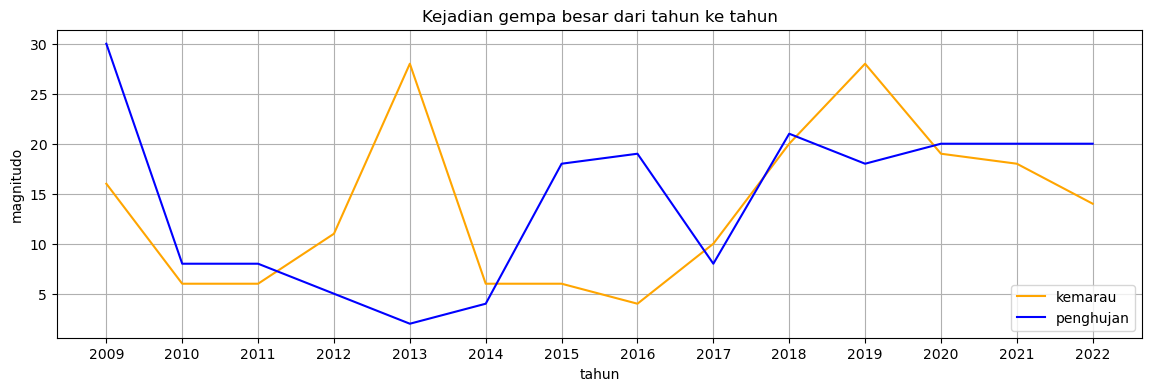

In [18]:
besarkemarau = gempabesar[gempabesar['musim'].isin(['kemarau'])]
besarpenghujan = gempabesar[gempabesar['musim'].isin(['penghujan'])]
gempabesarKemarau = besarkemarau.groupby([kemarau['waktu'].dt.year])['magnitudo'].count()
gempabesarPenghujan = besarpenghujan.groupby([penghujan['waktu'].dt.year])['magnitudo'].count()

fig, ax = plt.subplots(ncols=1,figsize=(14,4))
gempabesarKemarau.plot(kind='line',label='kemarau',color='orange', ax=ax)
gempabesarPenghujan.plot(kind='line',label='penghujan', color='blue', ax=ax)
# plt.yticks(np.arange(5, 9, 0.5))
plt.xticks(np.arange(2009, 2023))
plt.grid(True)
plt.xlabel("tahun")
plt.ylabel("magnitudo")
plt.title("Kejadian gempa besar dari tahun ke tahun")
plt.legend(loc='lower right')
plt.show

*Pada Grafik ini diketahui bahwa kejadian gempa besar tersebar tidak secara merata, karena pada beberapa tahun musim penghujan jauh lebih banyak, sedang pada tahun lainya musim kemarau lebih banyak. Sehingga dalam upaya perencanaan persiapan penanggulangan gempa, musim tidak dapat dijadikan acuan untuk lebih berfokus pada musim yang mana. Untuk membuktikan apakah ada perbedaan atau tidak maka akan dilakukan uji statistik lebih lanjut.*

In [19]:
print(f"jumlah gempa besar di musim kemarau adalah {round(gempabesarKemarau.sum())}\njumlah gempa besar di musim penghujan adalah {round(gempabesarPenghujan.sum())}")

jumlah gempa besar di musim kemarau adalah 192
jumlah gempa besar di musim penghujan adalah 196


In [20]:
skewbkema = stats.skew(gempabesarKemarau)
skewbhuj = stats.skew(gempabesarPenghujan)
print(f"skewness data gempa besar kemarau = {skewbkema}\nskewness data gempa besar penghujan = {skewbhuj}")

skewness data gempa besar kemarau = 0.5247969477982481
skewness data gempa besar penghujan = -0.10369388487137743


In [21]:
statistik, p_value = stats.mannwhitneyu(gempabesarKemarau, gempabesarPenghujan)
print("Statistik Uji Mann-Whitney:", statistik)
print("Nilai pValue ann-Whitney:", p_value)

Statistik Uji Mann-Whitney: 76.5
Nilai pValue ann-Whitney: 0.49485738784270317


*HO: Tidak ada perbedaan yang signifikan antara gemppa di musim kemarau dan gempa di musim penghujan*

*H1: Ada perbedaan yang signifikan antara gempa di musim kemarau dan gempa di musim penghujan*

*karena pvalue jauh lebih besar dari 0.05 maka H0 gagal ditolak dan dinyatakan data frekuensi gempa besar pada masing-masing tahun pada musim kemarau dan musim penghujan tidak memiliki perbedaan yang signifikan. hal tersebut sudah cukup terlihat melalui visualisasi grafik, namun adanya hasil perhitungan statistik ini smakin membuktikan bahwa kejadian gempa tidak menentu pada musim tertentu.*

<function matplotlib.pyplot.show(close=None, block=None)>

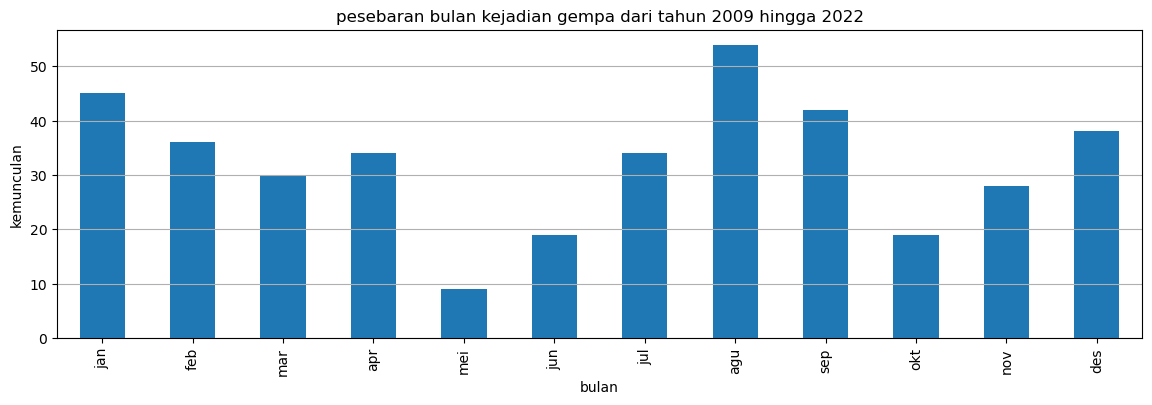

In [22]:
frekuensi_tahunan = gempabesar.groupby(gempabesar['waktu'].dt.month)['waktu'].count()
fig, ax = plt.subplots(ncols=1,figsize=(14,4))
frekuensi_tahunan.plot(kind='bar', ax=ax)
x = np.arange(0, 12)
bulan = ('jan', 'feb','mar','apr','mei','jun','jul','agu','sep','okt','nov','des')
plt.xticks(x,  bulan)
plt.grid(axis='y')
plt.xlabel("bulan")
plt.ylabel("kemunculan")
plt.title("pesebaran bulan kejadian gempa dari tahun 2009 hingga 2022")
plt.show

*Pada pesebaran bulan kejadian gempa besar, dari segi visual gambar terdapat perbedaan yang signifikan antara bulan yang paling sering mengalami gempa besar dan bulan yang paling jarang mengalami gempa besar dari tahun 2009 hingga tahun 2022. Bulan Agustus menjadi bulan yang paling sering mengalami gempa besar yang jumlahnya lebih dari 50. Berbanding terbalik dengan bulan mei dimana pada bulan tersebut kejadian gempa besarnya kurang dari sepuluh. sehingga pada bulan mei, bila dirata-rata pertahun maka bulan mei menjadi satu-satunya bulan yang rata-rata kejadian gempa besar pertahunya dibawah 1. Selainn bulan Agustus terdapat bulan Januari dan September yang jumlahnya cukup tinggi. Sedangkan bulan febuari, maret, juli, dan desember memiliki jumlah yang mirip yaitu pada rentan 30 hingga 40 kejadian gempa besar selama 13 tahun ini. bulan juni dan oktober termasuk yang mengalami sedikit kejadian walaupun tidak sesedikit bulan mei.*

In [23]:
datagempa.to_csv("data_gempa1.csv", index = False)

## **PERSEBARAN GEMPA PER WILAYAH.**

*gempa dikelompokan menjadi 10 wilayah berdasarkan pulau, hal ini untuk memudahkan dalam menganalisa sektor bagian mana yang paling sering atau paling jarang mengalami gempa. Wilayah terbesut mencangkup laut yang berada di dekatnya.*

In [24]:
pengelompokan_wilayah = {
    'Southern Sumatra - Indonesia':'Sumatra',
    'Minahassa Peninsula - Sulawesi': 'Sulawesi',
    'Banda Sea' : 'Sulawesi',
    'Bali Sea': 'Bali',
    'Sulawesi - Indonesia': 'Sulawesi',
    'Ceram Sea' : 'Maluku',
    'Irian Jaya Region - Indonesia' : 'Papua',
    'Borneo': 'Kalimantan',
    'Southern Molucca Sea': 'Maluku',
    'Flores Region - Indonesia': 'Nusa Tenggara',
    'Halmahera - Indonesia': 'Maluku',
    'Talaud Islands - Indonesia': 'Sulawesi',
    'Celebes Sea': 'Sulawesi',
    'Java - Indonesia': 'Jawa',
    'Flores Sea': 'Nusa Tenggara',
    'Aru Islands Region - Indonesia': 'Maluku',
    'Timor Region' : 'Nusa Tenggara',
    'Northern Sumatra - Indonesia': 'Sumatra',
    'Off West Coast of Northern Sumatra': 'Sumatra',
    'Sunda Strait - Indonesia': 'Jawa',
    'Tanimbar Islands Reg. - Indonesia': 'Maluku',
    'Sumbawa Region - Indonesia' : 'Nusa Tenggara',
    'Java Sea': 'Jawa',
    'South China Sea' : 'Sumatra',
    'Northern Molucca Sea' : 'Maluku',
    'South of Bali - Indonesia': 'Bali',
    'South of Java - Indonesia': 'Jawa',
    'Near North Coast of Irian Jaya': 'Papua',
    'Mindanao - Philippines': 'Sulawesi',
    'Seram - Indonesia': 'Maluku',
    'Buru - Indonesia': 'Maluku',
    'Southwest of Sumatra - Indonesia': 'Sumatra',
    'Irian Jaya - Indonesia': 'Papua',
    'Bali Region - Indonesia': 'Bali',
    'Timor Sea': 'Nusa Tenggara',
    'North of Halmahera - Indonesia' : 'Maluku',
    'Sulu Archipelago - Philippines': 'Sulawesi',
    'Philippine Islands Region': 'Sulawesi',
    'Malay Peninsula': 'Sumatra',
    'Sumba Region - Indonesia':'Nusa Tenggara',
    'Near N. Coast of New Guinea - PNG.': 'Papua',
    'South of Sumbawa - Indonesia': 'Nusa Tenggara',
    'W. Caroline Islands - Micronesia': 'Papua',
    'East of Philippine Islands': 'Sulawesi',
    'Savu Sea': 'Nusa Tenggara',
    'South Indian Ocean': 'Sumatra',
    'Arafura Sea': 'Papua',
    'Near S. Coast of New Guinea - PNG.': 'Papua',
    'New Guinea - Papua New Guinea': 'Papua',
    'Ninigo Islands Region - P.N.G.': 'Papua',
    'Near South Coast of Irian Jaya': 'Papua'
}

In [25]:
regiondatagempa = datagempa.copy()
regiondatagempa['wilayah'] = regiondatagempa['wilayah'].replace(pengelompokan_wilayah)
regiondatagempabesar = gempabesar.copy()
regiondatagempabesar['wilayah'] = regiondatagempabesar['wilayah'].replace(pengelompokan_wilayah)

In [26]:
regiondatagempa['wilayah'].unique()

array(['Sumatra', 'Sulawesi', 'Bali', 'Maluku', 'Papua', 'Kalimantan',
       'Nusa Tenggara', 'Jawa'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

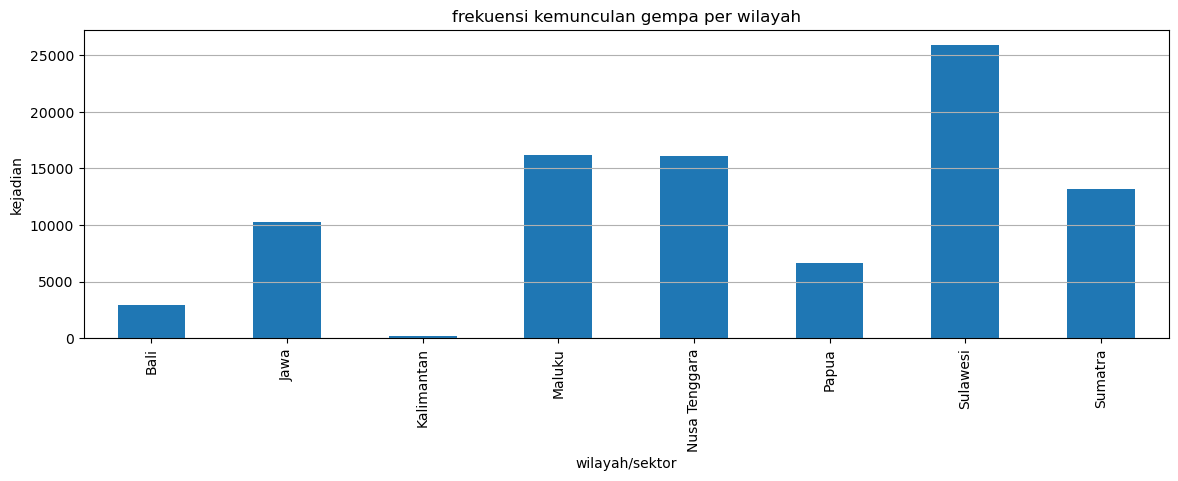

In [27]:
frekuensiperwilayah = regiondatagempa.groupby(regiondatagempa['wilayah'])['waktu'].count()
fig, ax = plt.subplots(ncols=1,figsize=(14,4))
frekuensiperwilayah.plot(kind='bar', ax=ax)
plt.grid(axis='y')
plt.xlabel("wilayah/sektor")
plt.ylabel("kejadian")
plt.title("frekuensi kemunculan gempa per wilayah")
plt.show


*Grafik ini menunjukan adanya perbedaan frekuensi kejadian gempa selama 13 tahun dari 2009 hingga 2022. Kalimantan merupakan sektor yang paling sedikit mengalami gempa sehingga kalimantan merupakan wilayah yang dianggap aman terkait gempa. Selain itu Kalimantan menjadi wilayah yang ideal untuk penyusunan rencana landscape dalam skala besar termasuk ibukota baru. sehingga dari data ini disimpulkan bahwa kalimanta tepat dipilih untuk menjadi wilayah ibukota baru berdasarkan pertimbangan ancaman gempa. sedangkan pulau yang paling sering mengalami gempa ialah pulau Sumatra dan Sulawesi.*

<function matplotlib.pyplot.show(close=None, block=None)>

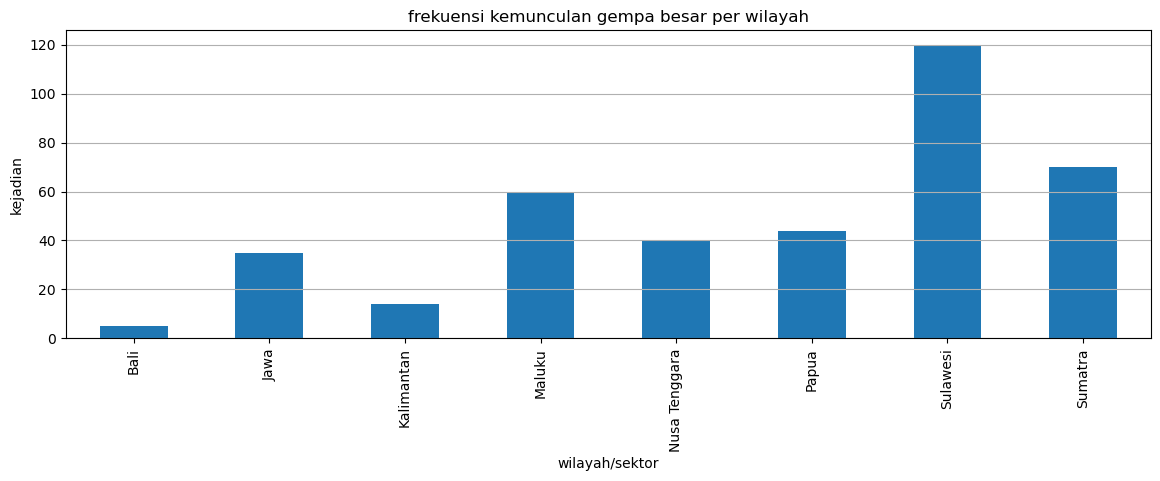

In [28]:
gempabesarperwilayah = regiondatagempabesar.groupby(regiondatagempabesar['wilayah'])['waktu'].count()
fig, ax = plt.subplots(ncols=1,figsize=(14,4))
gempabesarperwilayah.plot(kind='bar', ax=ax)
plt.grid(axis='y')
plt.xlabel("wilayah/sektor")
plt.ylabel("kejadian")
plt.title("frekuensi kemunculan gempa besar per wilayah")
plt.show

*Hal mengejutkan terjadi pada data kejadian gempa besar. Pada grafik ini menunjukan bahwa bali menjadi wilayah yang paling sedikit mengalami gempa besar. Walaupun frekueni gempa di bali lebih banyak dari kalimantan, namun ternyata sebagian besar dari kejadian gempa di bali selama 13 tahun ini ialah gempa kecil. Insight ini cukup baru dan mngejutkan, namun bali cukup dekat dengan nusa tenggara, sehingga kejadian gempa besar yang terjadi di nusa tenggara bisa saja berdampak terhadap Bali. Sehingga dari segi wilayah perencanaan tatakota, Kalimantan tetap yang utama.*

## KESIMPULAN

*Hasil analisis ini disimpulkan bahwa pesebaran gempa besar pernah mengalami penurunan yaitu pada tahun 2010 hingga tahun 2017. Namun pada tahun 2018 keatas frekuensi kejadian gempa besar naik lagi hingga tahun 2022. Sedangkan pesebaran bulan untuk kejadian gempa besar tidak tersebar secara merata. bulan mei ialah bulan yang paling sedikit mengalami gempa besar. Selain bulan mei ada lagi bulan Juni dan Oktober yang tidak terlalu banyak. Itu Artinya pada bulan ini jumlah rapat rutin dapat dikurangi untuk mengurangi anggaran rapat, namun tetap menyiapkan unit siaga. sedangkan dari segi musim, cukup bervariasi setiap tahunya, sehingga akan lebih optimal ketika kita menggunakan bulan sebagai pertibangan untuk penentuan waktu rapat rutin. Dari segi wilayah, Kalimantan ialah wilayah yang paling sedikit mengalami gempa, baik dari segi frekuensi kejadian gempa keseluruhan maupun frekuensi kejadain gempa besar. Wilayah Bali juga cukup sedikit, namun Bali berdekatan dengan wilayah Nusa Tenggara sehingga tidak seaman Kalimantan. Oleh karena itu evaluasi terhadap pemilihan Kalimantan sebagai wilayah yang dipilih sebagai ibu kota baru dinilai tepat dari segi keamanan potensi gempa.*

In [29]:
def kategori(magnitudo):
    if magnitudo > 6.0:
        return 'besar'
    else:
        return 'kecil'

regiondatagempa['kategori'] = regiondatagempa['magnitudo'].apply(kategori)

regiondatagempa.to_csv('data_tableau.csv',index=False)